# Introduction to Image Processing

Mojdeh Rastgoo - Desire Sidibe

# 4. Spatial Filtering and de-noising

Importing the necessary libraries an modules.

In [1]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color

# import the function to add some noise
from skimage.util import random_noise

from skimage import filters
from skimage import morphology


## 4.1 Smoothing

### 4.1.1 Mean filter 
**Q.1** Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 3, 5, 7$
show your results, remember to add title to your images. 

Use [`skimage.filters.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

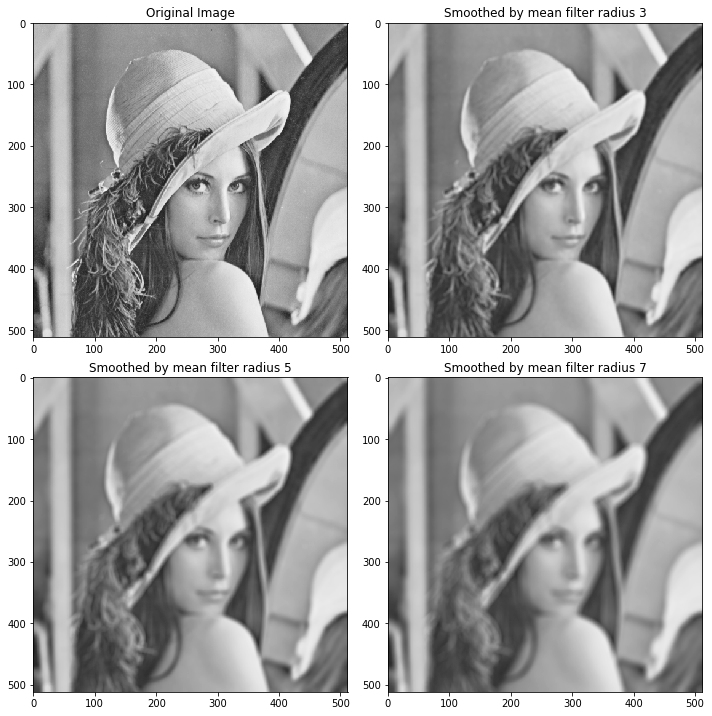

In [40]:
#Import the lena image
img_path = './images/'
img_name = 'lena-grey.bmp'
lena_im = io.imread(img_path.__add__(img_name))
lena_im = img_as_ubyte(lena_im)

#Create masks of radius 3,5,7
disk3 = morphology.disk(3)
disk5 = morphology.disk(5)
disk7 = morphology.disk(7)

#Use the mean filter to apply each of the three masks to the lena image
lena_smoothed3 = filters.rank.mean(lena_im,disk3)
lena_smoothed5 = filters.rank.mean(lena_im,disk5)
lena_smoothed7 = filters.rank.mean(lena_im,disk7)

#Plot the images together to compare
fig = plt.figure(figsize=(10, 10))

plt.subplot(221)
io.imshow(lena_im, cmap = cm.Greys_r)
plt.title("Original Image")

plt.subplot(222)
io.imshow(lena_smoothed3, cmap = cm.Greys_r)
plt.title("Smoothed by mean filter radius 3")

plt.subplot(223)
io.imshow(lena_smoothed5, cmap = cm.Greys_r)
plt.title("Smoothed by mean filter radius 5")

plt.subplot(224)
io.imshow(lena_smoothed7, cmap = cm.Greys_r)
plt.title("Smoothed by mean filter radius 7");

#The lena image is progressively smoother as the radius increases

### 4.1.2 Filtering using convolution 
**Q.2** Once again apply the mean fiter, howver instead of using `filters.rank` make your mean mask having the same size as the last filter you applied in the previous question (disk of 7) and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

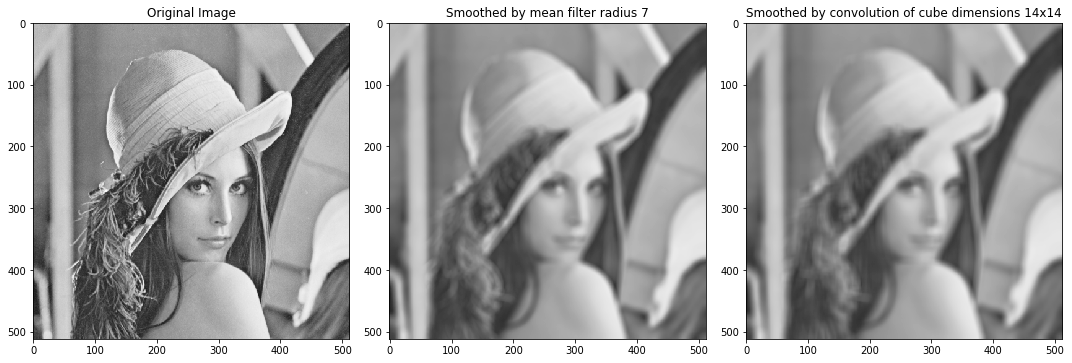

In [3]:
from scipy import ndimage

#Create a mask that is a square of size 14x14 pixels and will act like the mask above
new_disk7 = (1./196.)*np.ones((14,14));

#Compute the convolution between the mask and an image
new_lena_smoothed7 = ndimage.filters.convolve(lena_im, new_disk7)

#Plot the images together to compare
fig = plt.figure(figsize=(15, 15))

plt.subplot(131)
io.imshow(lena_im, cmap = cm.Greys_r)
plt.title("Original Image")

plt.subplot(132)
io.imshow(lena_smoothed7, cmap = cm.Greys_r)
plt.title("Smoothed by mean filter radius 7")

plt.subplot(133)
io.imshow(new_lena_smoothed7, cmap = cm.Greys_r)
plt.title("Smoothed by convolution of cube dimensions 14x14");

#The images look similar, although they are smoothed by slightly different masks (a circle and cube)

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

## 4.2 Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters are already implemented in `skimage` and can be directly used without applying the previous processing.

check the modules `filters` and `filters.rank` for more information.

In [4]:
from skimage import filters

### 4.2.1 First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator is an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Q.3** Apply `roberts`, `prewitt`, `sobel` and `scharr` filters on Leaves image (`leaves.jpg`).

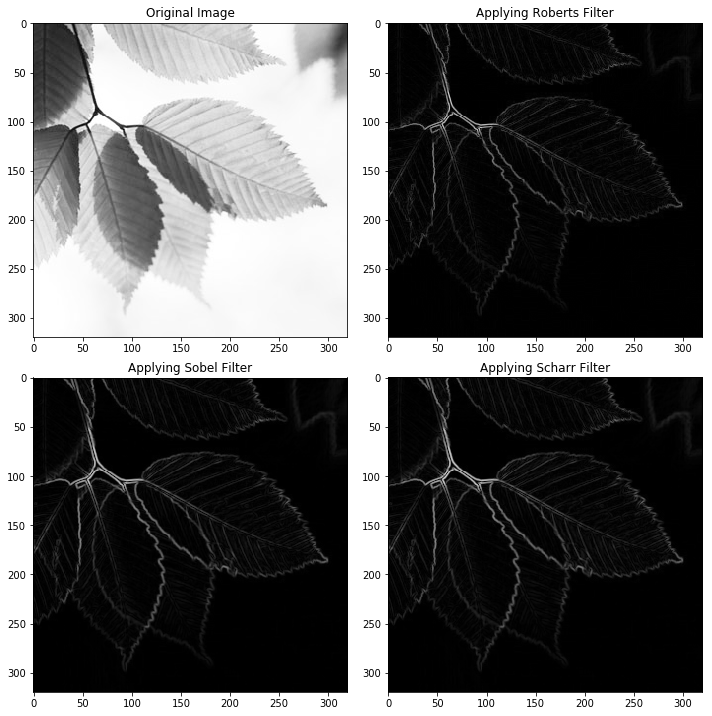

In [5]:
img_name = 'leaves.jpg'
leaves_im = io.imread(img_path.__add__(img_name),as_grey = True)

#Apply the Robert, Sobel, and Scharr filters on the leaves image
leaves_im_roberts = filters.roberts(leaves_im)
leaves_im_sobel = filters.sobel(leaves_im)
leaves_im_scharr = filters.scharr(leaves_im)

#Plot the images together to compare
fig = plt.figure(figsize=(10, 10))

plt.subplot(221)
io.imshow(leaves_im, cmap = cm.Greys_r)
plt.title("Original Image")

plt.subplot(222)
io.imshow(leaves_im_roberts, cmap = cm.Greys_r)
plt.title("Applying Roberts Filter")

plt.subplot(223)
io.imshow(leaves_im_sobel, cmap = cm.Greys_r)
plt.title("Applying Sobel Filter")

plt.subplot(224)
io.imshow(leaves_im_scharr, cmap = cm.Greys_r)
plt.title("Applying Scharr Filter");

#The sobel and scharr filters appear to have the most defined edges, and roberts
#detects the edges as well

**Q.4** Implement sobel filters using convolution operation.
Reminder, sobels operators in horizontal and vertical are as follows.

$$S_x = \begin{bmatrix}1& 0 & -1\\ 2 & 0 & -2 \\ 1 & 0 & -1\end{bmatrix}, \qquad S_y = \begin{bmatrix}1& 2 & 1\\ 0 & 0 & 0 \\ -1 & -2 & -1\end{bmatrix}$$

and then show the magnitude and angle image obtained from the filter 

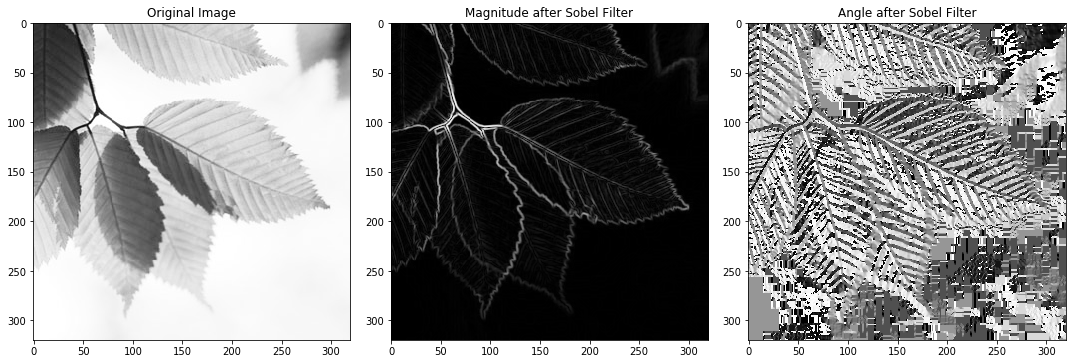

In [6]:
#Define the sobel filter in the x and y direction and convert to np.array so that the matrix can be multiplied by 0.25.
#This normalizes the sobel filter
Sx = 0.25*np.array([[1,0,-1],[2,0,-2],[1,0,-1]]);
Sy = 0.25*np.array([[1,2,1],[0,0,0],[-1,-2,-1]]);

#Convolve the image with the the sobel filter in each direction
leaves_im_Sx = ndimage.filters.convolve(leaves_im, Sx)
leaves_im_Sy = ndimage.filters.convolve(leaves_im, Sy)

#Compute the magnitude and angle of the filtered image
leaves_magnitude = np.sqrt((leaves_im_Sx)**(2.) + (leaves_im_Sy)**(2.))
leaves_angle = np.arctan2(leaves_im_Sy,leaves_im_Sx)

#Plot the images together to compare
fig = plt.figure(figsize=(15, 15))

plt.subplot(131)
io.imshow(leaves_im, cmap = cm.Greys_r)
plt.title("Original Image")

plt.subplot(132)
io.imshow(leaves_magnitude, cmap = cm.Greys_r)
plt.title("Magnitude after Sobel Filter")

plt.subplot(133)
plt.imshow(leaves_angle, cmap = cm.Greys_r)
plt.title("Angle after Sobel Filter");


### 4.2.2 Second-order edge detector (Laplace filter)

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does provides an implementation of this filter in `filters.laplace` modules. 

**Q.4** Apply this filter on the Leaves image.

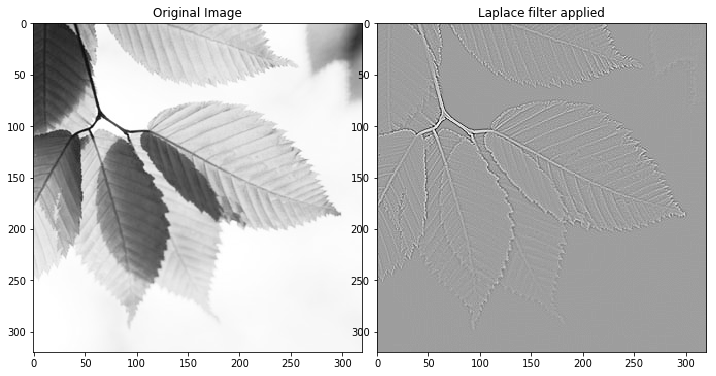

In [7]:
#Apply the laplace filter to the leaves image
leaves_im_laplace = ndimage.filters.laplace(leaves_im)

#Plot the images together to compare
fig = plt.figure(figsize=(10, 10))

plt.subplot(121)
io.imshow(leaves_im, cmap = cm.Greys_r)
plt.title("Original Image")

plt.subplot(122)
plt.imshow(leaves_im_laplace, cmap = cm.Greys_r)
plt.title("Laplace filter applied");

#The laplace filter also detects the edges from the second derivative

### 4.2.3 Angular edge detector (Gabor filter)

In the previous section, edges are detected using the response of two kernels (i.e., horizontal and vertical kernels) which are later combined (i.e., magnitude and angle). 

Gabor filters is a family of filters which are sensitive to a specific angle and a specific frequency.
Gabor filter is defined by a sinusoidal wave multiplied by a guassian, the complex form of this filter is presented bellow :

$$g(x,y;\lambda,\theta,\psi,\sigma,\gamma) = \exp\left(-\frac{x'^2+\gamma^2y'^2}{2\sigma^2}\right)\exp\left(i\left(2\pi\frac{x'}{\lambda}+\psi\right)\right)$$

where 
$$
{\displaystyle x'=x\cos \theta +y\sin \theta \,}$$
and
$$
{\displaystyle y'=-x\sin \theta +y\cos \theta \,} $$
`Skimage` provides an implementation of gabor filtering in [`filters.gabor`](http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gabor)


**Q.5 **Apply this filter to find the edges at 60 degrees in Lena image. Try with different frequencies in the range [0.05, 0.5].

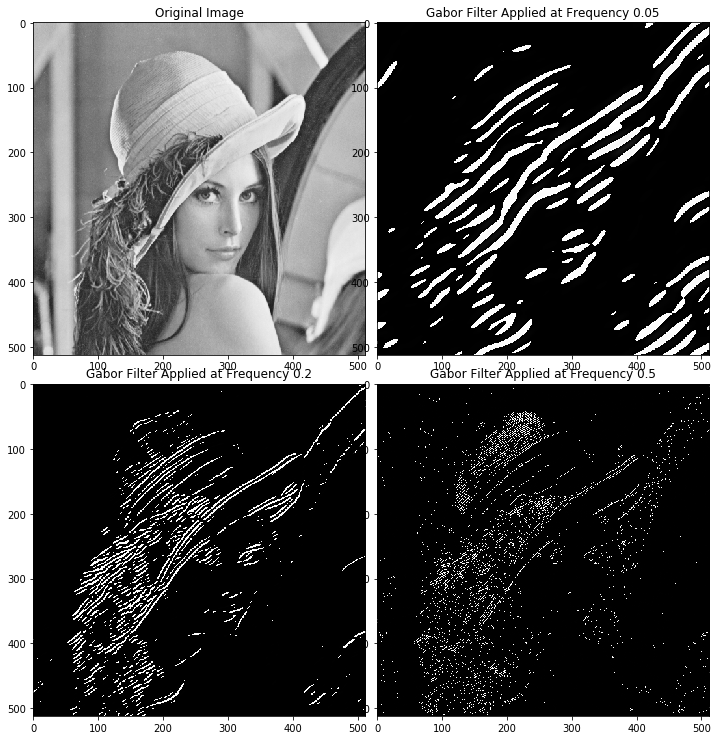

In [8]:
#Apply the gabor filter to the lena image at 60degrees = 1.0472 and frequencies of 0.05,0.2,and 0.5
[gabor_real, gabor_imag] = filters.gabor(lena_im, 0.05, 1.0472)
[gabor_real2, gabor_imag2] = filters.gabor(lena_im, 0.2, 1.0472)
[gabor_real3, gabor_imag3] = filters.gabor(lena_im, 0.5, 1.0472)


#Plot the images together to compare
fig = plt.figure(figsize=(10, 10))

plt.subplot(221)
io.imshow(lena_im, cmap = cm.Greys_r)
plt.title("Original Image")

plt.subplot(222)
plt.imshow(gabor_real, cmap = cm.Greys_r)
plt.title("Gabor Filter Applied at Frequency 0.05");

plt.subplot(223)
plt.imshow(gabor_real2, cmap = cm.Greys_r)
plt.title("Gabor Filter Applied at Frequency 0.2");

plt.subplot(224)
plt.imshow(gabor_real3, cmap = cm.Greys_r)
plt.title("Gabor Filter Applied at Frequency 0.5");

#The gabor filter seems to find the edges best with the 0.2 (mid-range) frequency applied

## 4.3 Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function [`util.random_noise`](http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise).

**Q.6 ** Generate several corrupted Lena images with `gaussian` noise, `salt & peppers` noise, and `speckle` noise. Keep the default parameters.

In [8]:
from skimage import util

/Users/briannaburton/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


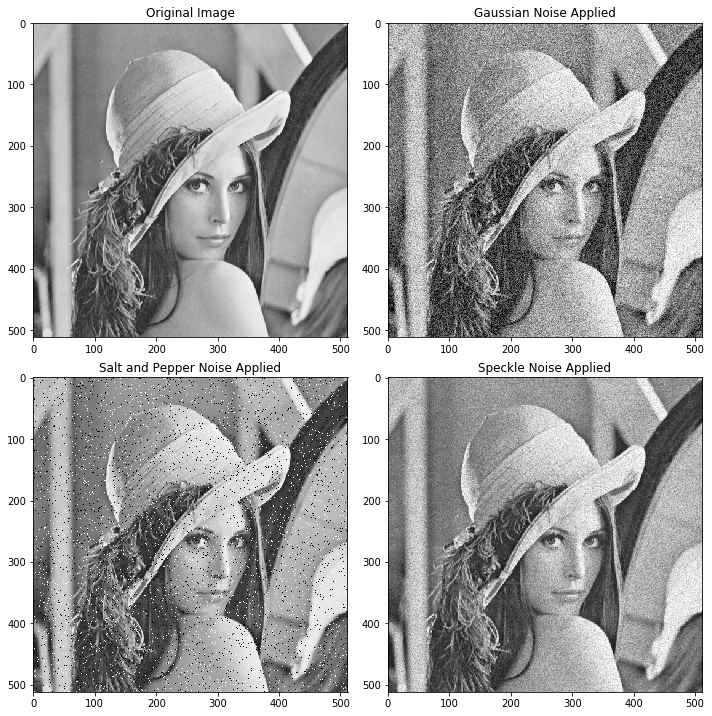

In [47]:
#Import lena as a float image and convert the values to between 0 and 1 so it can be shown using io.imshow

#Convert lena image to float as the random_noise function outputs the image as float
lena_im = img_as_float(lena_im)

#Use random_noise to add gaussian, salt and pepper, and speckle noise to the image and
#convert the image back to ubyte to be used in the smoothing functions below (which require ubyte)
lena_gaussian = img_as_ubyte(util.random_noise(lena_im, mode = 'gaussian'))
lena_saltppr = img_as_ubyte(util.random_noise(lena_im, mode = 's&p'))
lena_speckle = img_as_ubyte(util.random_noise(lena_im, mode = 'speckle'))

#Plot the images together to compare
fig = plt.figure(figsize=(10, 10))

plt.subplot(221)
io.imshow(lena_im, cmap = cm.Greys_r)
plt.title("Original Image")

plt.subplot(222)
io.imshow(lena_gaussian, cmap = cm.Greys_r)
plt.title("Gaussian Noise Applied");

plt.subplot(223)
io.imshow(lena_saltppr, cmap = cm.Greys_r)
plt.title("Salt and Pepper Noise Applied");

plt.subplot(224)
io.imshow(lena_speckle, cmap = cm.Greys_r)
plt.title("Speckle Noise Applied");

**Q.7** Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** Q.7.1 mean filter: **

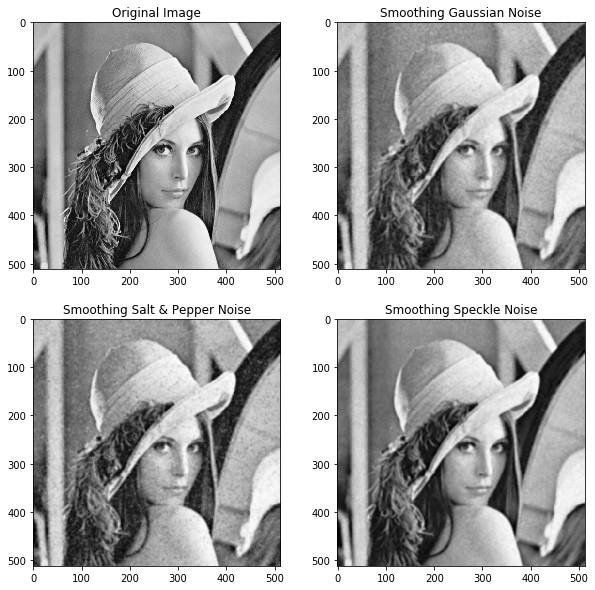

In [49]:
#Apply the disk of radius 7 pixels to as a mean filter for all of the noise types
lena_mean_gaussian = filters.rank.mean(lena_gaussian,disk3)
lena_mean_saltppr = filters.rank.mean(lena_saltppr,disk3)
lena_mean_speckle = filters.rank.mean(lena_speckle,disk3)

#Plot the images together to compare
fig = plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(lena_im, cmap = cm.Greys_r)
plt.title("Original Image")

plt.subplot(222)
plt.imshow(lena_mean_gaussian, cmap = cm.Greys_r)
plt.title("Smoothing Gaussian Noise")

plt.subplot(223)
plt.imshow(lena_mean_saltppr, cmap = cm.Greys_r)
plt.title("Smoothing Salt & Pepper Noise");

plt.subplot(224)
plt.imshow(lena_mean_speckle, cmap = cm.Greys_r)
plt.title("Smoothing Speckle Noise");

#The speckle noise seems to be best smoothed by the mean filter, and the salt and pepper the least.

** Q.7.2 alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

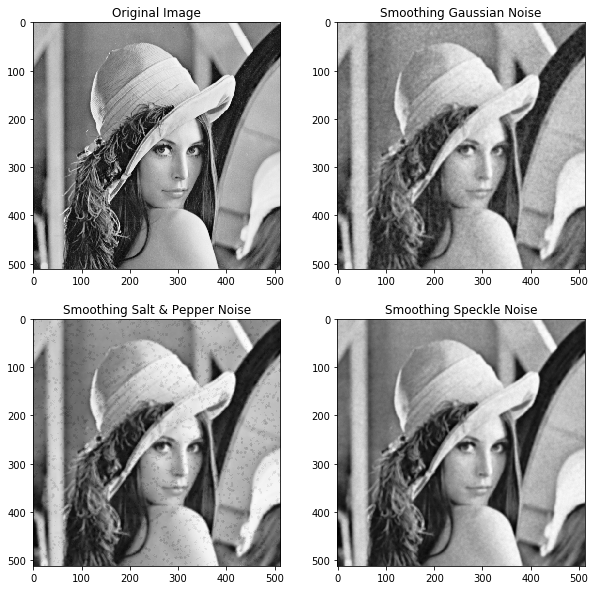

In [50]:
#Apply the disk of radius 7 pixels to as a alpha-trimmed filter for all of the noise 
#types using the range specified above
lena_mean_percent_mean = filters.rank.mean_percentile(lena_gaussian,disk3, p0 = 0.05, p1 = 0.95)
lena_mean_percent_saltppr = filters.rank.mean_percentile(lena_saltppr,disk3, p0 = 0.05, p1 = 0.95)
lena_mean_percent_speckle = filters.rank.mean_percentile(lena_speckle,disk3, p0 = 0.05, p1 = 0.95)

#Plot the images together to compare
fig = plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(lena_im, cmap = cm.Greys_r)
plt.title("Original Image")

plt.subplot(222)
plt.imshow(lena_mean_percent_mean, cmap = cm.Greys_r)
plt.title("Smoothing Gaussian Noise")

plt.subplot(223)
plt.imshow(lena_mean_percent_saltppr, cmap = cm.Greys_r)
plt.title("Smoothing Salt & Pepper Noise");

plt.subplot(224)
plt.imshow(lena_mean_percent_speckle, cmap = cm.Greys_r)
plt.title("Smoothing Speckle Noise");

#The speckle noise seems to be best smoothed by the alpha-trimmed filter, and the salt and pepper the least.

** Q.7.3 median filter: **

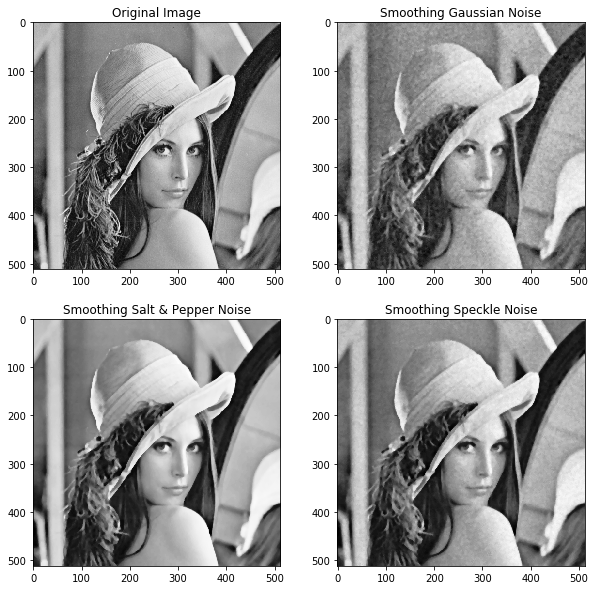

In [51]:
lena_median_gaussian = filters.rank.median(lena_gaussian,disk3)
lena_median_saltppr = filters.rank.median(lena_saltppr,disk3)
lena_median_speckle = filters.rank.median(lena_speckle,disk3)

#Plot the images together to compare
fig = plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(lena_im, cmap = cm.Greys_r)
plt.title("Original Image")

plt.subplot(222)
plt.imshow(lena_median_gaussian, cmap = cm.Greys_r)
plt.title("Smoothing Gaussian Noise")

plt.subplot(223)
plt.imshow(lena_median_saltppr, cmap = cm.Greys_r)
plt.title("Smoothing Salt & Pepper Noise");

plt.subplot(224)
plt.imshow(lena_median_speckle, cmap = cm.Greys_r)
plt.title("Smoothing Speckle Noise");

#The salt and pepper noise seems to be best smoothed by the median filter, and the gaussian the least.

## 4.4 Sharpening

**Q.8** Use the `railway` image and sharpen the image using laplacian fitering.

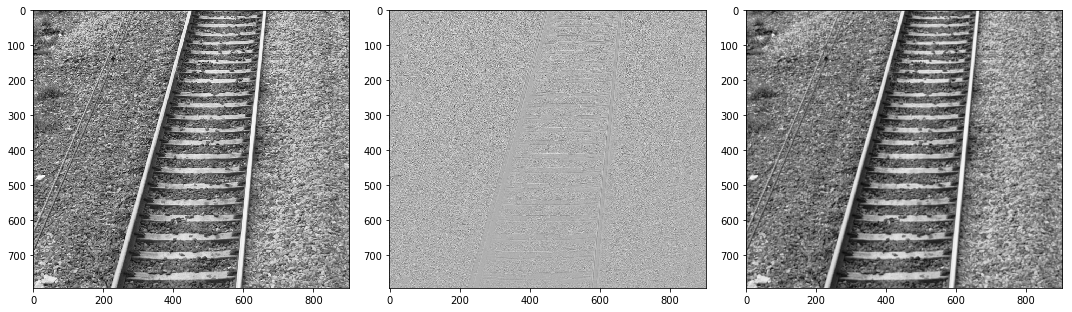

In [54]:
from skimage import exposure

#Import the railway image as black and white
img_name = 'railway.jpg'
railway_im = io.imread(img_path.__add__(img_name),as_grey = True)

railway_im_laplace = ndimage.filters.laplace(railway_im)

railway_im_laplace = exposure.rescale_intensity(railway_im_laplace, in_range='image', out_range=(0,1))

new_railway_im = exposure.rescale_intensity((railway_im + railway_im_laplace),in_range='image', out_range=(0,1))

#Plot the images together to compare
fig = plt.figure(figsize=(15, 15))

plt.subplot(131)
io.imshow(railway_im,cmap = cm.Greys_r);

plt.subplot(132)
io.imshow(railway_im_laplace,cmap = cm.Greys_r);

plt.subplot(133)
io.imshow(new_railway_im,cmap = cm.Greys_r);

## 4.5 Hough transform

** Q.9 ** Define your Hough_trans function which finds the lines within an image

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` or `cv2.canny` edge detector to find the primary edges**